---

# A look at the shadow of [HD 332231 b](https://ui.adsabs.harvard.edu/abs/2021arXiv211114968K/abstract)
Here we will be using <s>tracit</s> to study the shadow of HD 332231 b

---

First we link to the path, where <s>tracit</s> is located

In [1]:
import sys
sys.path.append('/home/emil/Desktop/PhD/tracit')

Then we import <s>tracit</s>.
The two run commands are just to setup text rendering in the plots to LaTeX.

In [2]:
import tracit
nproc = 1

tracit.run_bus(nproc)
tracit.run_exp(nproc)

We want to create two .csv files: 
1. In this we specify the values for the parameters, priors, boundaries, etc.
2. In this we give the filenames for our data, and we can also specify the de-trending/noise model

We'll cal the first one 'par.csv' and the second one 'dat.csv'. 

In [3]:
pfile = 'par.csv'
dfile = 'dat.csv'

create_file = 0 #set to 0 to make sure we don't overwrite the files once they are created
if create_file:
    tracit.params_temp(pfile,n_spec=1,n_phot=1,n_planets=1)
    tracit.data_temp(dfile,n_spec=1,n_phot=1)

Assuming we now have filled out the two files, we can now read them in as dictionaries.

In [4]:
par = tracit.params_structure(pfile)
dat = tracit.data_structure(dfile)

Before we run our MCMC, it's a good idea to check that our parameters/data look reasonable. We therefore plot the light curve and the radial velocity curve.

In [5]:
saved_results = 1 # set to 1 if you want to read in the results instead
if saved_results:
    import pandas as pd
    rdf = pd.read_csv('results.csv')

In [6]:
par = tracit.params_structure(pfile,updated_pars=rdf)

In [7]:
pre_inspect = 0
if pre_inspect:
    #tracit.plot_lightcurve(par,dat)
    tracit.plot_shadow(par,dat)

/home/emil/Desktop/PhD/tracit/tracit/shady.py:387: RuntimeWarning: divide by zero encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y
/home/emil/Desktop/PhD/tracit/tracit/shady.py:387: RuntimeWarning: invalid value encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y


Using indices [39, 40, 41] as out-of-transit spectra
## Spectroscopic system 1/HARPS-N ##:

Reduced chi-squared for the oot CCF is:
	 0.698
Factor to apply to get a reduced chi-squared around 1.0 is:
	 0.835

Number of data points: 39
Number of fitting parameters: 3
#########################


/home/emil/Desktop/PhD/tracit/tracit/shady.py:387: RuntimeWarning: divide by zero encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y
/home/emil/Desktop/PhD/tracit/tracit/shady.py:387: RuntimeWarning: invalid value encountered in true_divide
  tan = np.exp(-1*np.power(vel_1d/(zeta*y),2))/y


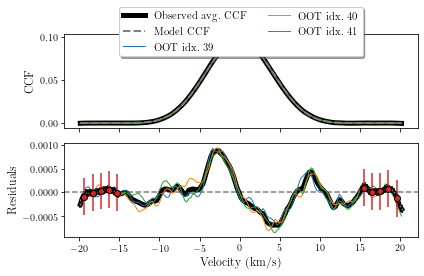

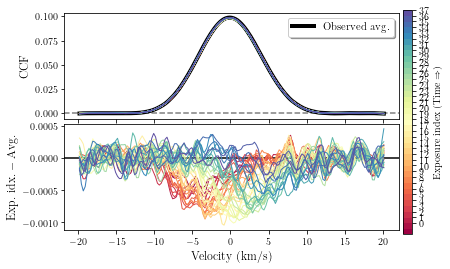

In [8]:
tracit.plot_oot_ccf2(par,dat)

There's obviously room for some improvement here, so let's hope our MCMC can fix that. We can specify the number of CPUs we have at our disposal through *nproc*. We can also generate some instructive plots that allow us to inspect how the MCMC was performing; we can inspect how the walkers were walking using the *chains* argument, and we can see the 2D correlation plot through the *corner* argument.

We will do 10,000 draws with 20 walkers.

In [9]:
mc = 0
if mc:
    ndraws = 10000
    nwalkers = 20
    
    rdf = tracit.mcmc(pfile,dfile,ndraws,nwalkers,nproc=nproc,corner=True,chains=True)

Even though we set the number of draws to 10,000, the routine stopped earlier because the MCMC had converged.
After this we might want to take a look at the resulting parameters, which are both saved to 'results.csv', but also returned in the dataframe *rdf*.

If we have results from an earlier run, we can also just load the results into a dataframe.

In [10]:
print(rdf)

   Parameter                   P_b                    Spec_1:T0_b  \
0      Label  $P \rm _b \  (days)$  $T \rm _{0,b} \ (BJD) Spec_1$   
1     Median              18.71205                   2458729.6940   
2      Lower               0.00001                         0.0020   
3      Upper               0.00001                         0.0019   
4   Best-fit             18.712049                   2458729.6929   
5       Mode              18.71205                   2458729.6939   
6      Prior                   uni                            uni   
7   Location             18.712062                    2458729.681   
8      Width               0.00023                       0.000275   
9      Lower                18.703                     2458729.65   
10     Upper                 18.72                     2458729.73   
11      Rhat    1.0018384552774404             1.0021443445088065   

                      T0_b                         Rp_Rs_b  \
0   $T \rm _{0,b} \ (BJD)$  $(R_\mathrm{

Finally, we probably want to see that things have actually improved. Therefore, we plot the data again, but this time we update our parameter dictionary with our new parameters before passing it to the plotting routines.

In [11]:
post_inspect = 0
if post_inspect:
    par = tracit.params_structure(pfile,updated_pars=rdf)
    tracit.plot_lightcurve(par,dat)
    tracit.plot_orbit(par,dat,updated_pars=rdf)

Arguably this looks much better.